# LoC/RoC detection for EEG signal under general anesthesia (Propofol/Sevoflurane)

**Goal**

- Load the data
- Compute the LoC and RoC 
- Visualize LoC and RoC on a spectrogram



In [2]:
import mne
import numpy as np
from boost_loc_roc.LoC_RoC import *

In [3]:
# Here we load one EEG recording
filename = 'data/raw/eeg_example.fif'
file_tmp = mne.io.read_raw_fif(filename)

Opening raw data file data/raw/eeg_example.fif...
Isotrak not found
    Range : 0 ... 82217 =      0.000 ...   922.989 secs
Ready.


C:\Users\Cartailler Jerome\AppData\Local\Temp\ipykernel_19896\2251230688.py:3: RuntimeWarning: This filename (data/raw/eeg_example.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  file_tmp = mne.io.read_raw_fif(filename)


# LoC/RoC detection 


**Remark**
The following code is used on ICEO file but should be easily extended to other dataset. 

This step can be embedded directly in the loop dealing with other segmentation processes.

The following cell is thus only for pedagogical purposes, but can also serve as an inspection step. 

Creating RawArray with float64 data, n_channels=4, n_times=78628
    Range : 0 ... 78627 =      0.000 ...   882.687 secs
Ready.
sfreq 89.07691955566406
Effective window size : 8.127 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


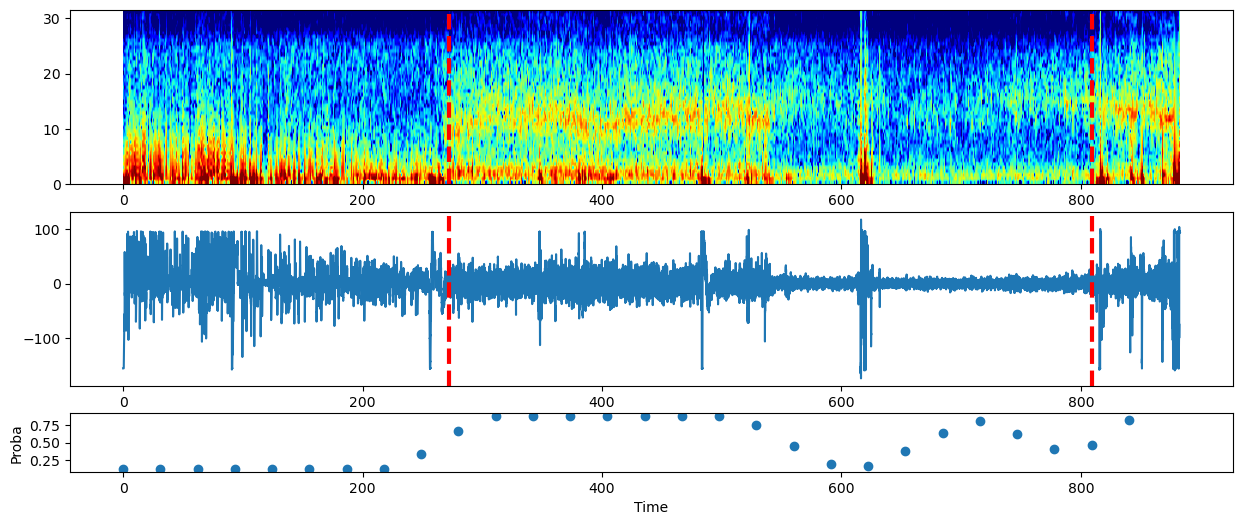

CPU times: total: 391 ms
Wall time: 487 ms


In [5]:
%%time

# Truncate the file
file_tmp = Truncate_fif(file_tmp)

# Calculate the duration of the file in seconds
duration_sec = file_tmp.n_times / file_tmp.info['sfreq']
print('sfreq', file_tmp.info['sfreq'])

# Check if the duration is greater than 5 minutes
if duration_sec > 5 * 60:
    # Resample the file to 63 Hz
    file_tmp = file_tmp.resample(63)
    
    # Extract sampling frequency and create a time vector
    Fs = file_tmp.info['sfreq']  # Hz
    time = np.linspace(0, file_tmp.get_data().shape[1]/Fs, file_tmp.get_data().shape[1], endpoint=False)
    
    # Extract the EEG data and convert to microvolts
    Fp2 = file_tmp.get_data()[1,:]*10**6  # 10*6 because .fif is saved in Volts
    
    # Compute LoC and RoC
    time_loc, time_roc, t_proba, proba, tmp1, tmp2 = extract_loc_roc(file_tmp)

    # Visualize Spectrogram, EEG, and proba
    plot_spectrogram(time_loc, time_roc, Fp2, Fs, time, t_proba, proba)

## Check sigmoids fit on probabilities

Creating RawArray with float64 data, n_channels=4, n_times=55610
    Range : 0 ... 55609 =      0.000 ...   882.683 secs
Ready.
sfreq 63.0
Sampling frequency of the instance is already 63.0, returning unmodified.
Effective window size : 8.127 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Cartailler Jerome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


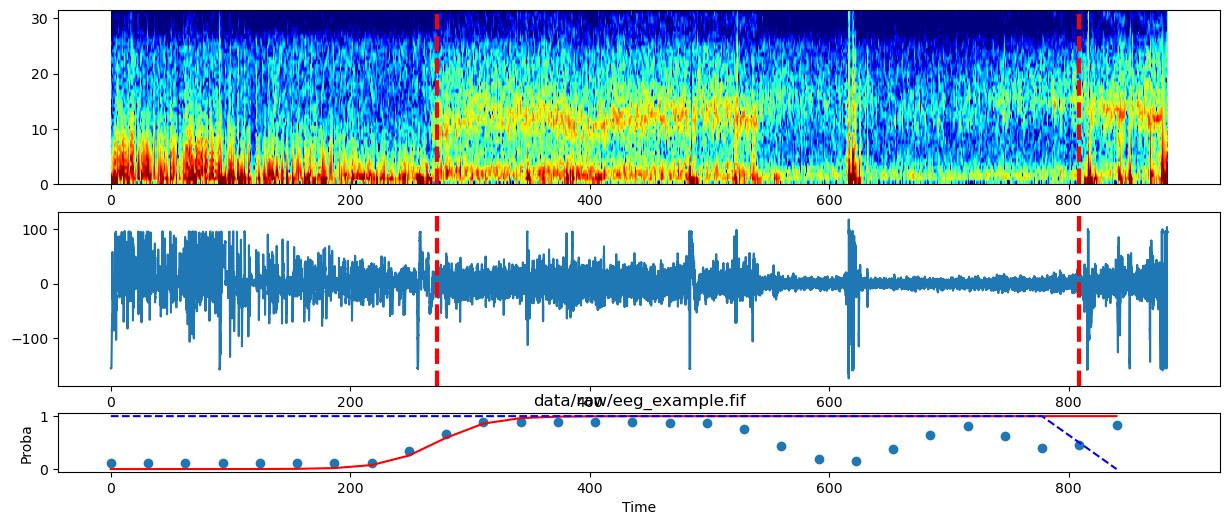

CPU times: total: 438 ms
Wall time: 520 ms


In [7]:
%%time

# Truncate the file
file_tmp = Truncate_fif(file_tmp)

# Calculate the duration in seconds
duration_sec = file_tmp.n_times / file_tmp.info['sfreq']
print('sfreq', file_tmp.info['sfreq'])

# Check if the duration is greater than 5 minutes
if duration_sec > 5 * 60:
    # Resample the file to 63 Hz
    file_tmp = file_tmp.resample(63)
    
    # Extract the sampling frequency and create a time vector
    Fs = file_tmp.info['sfreq']  # Hz
    time = np.linspace(0, file_tmp.get_data().shape[1]/Fs, file_tmp.get_data().shape[1], endpoint=False)
    Fp2 = file_tmp.get_data()[1,:]*10**6  # 10*6 because .fif is saved in Volts

    # Extract parameters and data for LoC and RoC
    time_loc, time_roc, t_proba, proba, LoC_params, RoC_params = extract_loc_roc(file_tmp)
 
    # Visualize Spectrogram, EEG, and proba
    plot_spectrogram_debug(time_loc, time_roc, Fp2, Fs, time, t_proba, proba, LoC_params, RoC_params, filename)

## Applying Volt/microVolt unit correction 

==> use check_and_rescale_units function.

In [9]:
# Import the check_and_rescale_units function from the boost_loc_roc.miscelaneous module
from boost_loc_roc.miscelaneous import check_and_rescale_units

# Define the filename variable with the path to the EEG data file
filename = 'data/raw/eeg_example.fif'

# Call the check_and_rescale_units function with the specified filename and threshold value of 5 uV
check_and_rescale_units(filename, threshold=5)

Opening raw data file data/raw/eeg_example.fif...
Isotrak not found
    Range : 0 ... 82217 =      0.000 ...   922.989 secs
Ready.
Reading 0 ... 82217  =      0.000 ...   922.989 secs...
The units are likely already in volts. No rescaling needed.


C:\Users\Cartailler Jerome\Dropbox\Tungsten\New_Loc_Roc\boost_loc_roc\miscelaneous.py:18: RuntimeWarning: This filename (data/raw/eeg_example.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filename, preload=True)
